# Day 6: Sequence Models in Deep Learning

In [1]:
%load_ext autoreload
%autoreload 2

### Exercise 6.1 
Convince yourself that a RNN is just an FF unfolded in time. Complete the `backpropagation()` method in the `NumpyRNN` class in 

    lxmls/deep_learning/numpy_models/rnn.py 
    
and compare it with

    lxmls/deep_learning/numpy_models/mlp.py.

### WSJ Data
To work with RNNs we will use the Part-of-speech data-set seen in the sequence models day.

In [2]:
# Load Part-of-Speech data 
from lxmls.readers.pos_corpus import PostagCorpusData
data = PostagCorpusData()

Load and configure the NumpyRNN. Remember to use reload if you want to modify the code inside the rnns module

In [3]:
from lxmls.deep_learning.numpy_models.rnn import NumpyRNN
model = NumpyRNN(
    input_size=data.input_size,
    embedding_size=50,
    hidden_size=20,
    output_size=data.output_size,
    learning_rate=0.1
)

#### Milestone 1:

As in the case of the feed-forward networks you can use the following setup to test step by step the implementation of the gradients. First compute the cost variation for the variation of a single weight

In [4]:
print([x.shape for x in model.parameters])

[(4786, 50), (20, 50), (20, 20), (12, 20)]


In [55]:
from lxmls.deep_learning.rnn import get_rnn_parameter_handlers, get_rnn_loss_range

# Get functions to get and set values of a particular weight of the model
get_parameter, set_parameter = get_rnn_parameter_handlers(
    layer_index=-1,
    row=0, 
    column=0
)

# Get batch of data
batch = data.batches('train', batch_size=1)[0]

# Get loss and weight value
current_loss = model.cross_entropy_loss(batch['input'], batch['output'])
current_weight = get_parameter(model.parameters)

# Get range of values of the weight and loss around current parameters values
weight_range, loss_range = get_rnn_loss_range(model, get_parameter, set_parameter, batch)

Then conmpute the desired gradient from your implementation

In [56]:
batch['input'].shape, batch['output'].shape

((5,), (5,))

In [71]:
# Get the gradient value for that weight
gradients = model.backpropagation(batch['input'], batch['output'])
current_gradient = get_parameter(gradients)

And finally call matlplotlib to plot the loss variation versus the gradient

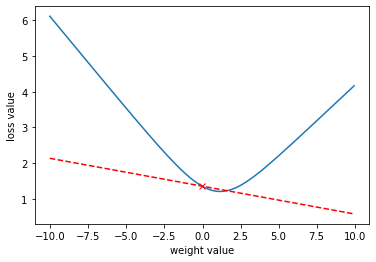

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot empirical
plt.plot(weight_range, loss_range)
plt.plot(current_weight, current_loss, 'xr')
plt.ylabel('loss value')
plt.xlabel('weight value')
# Plot real
h = plt.plot(
    weight_range,
    current_gradient*(weight_range - current_weight) + current_loss, 
    'r--'
)
plt.show()

#### Milestone 2:
After you have completed the gradients you can run the model in the POS task

In [73]:
# Hyper-parameters
num_epochs = 20

import numpy as np

# Get batch iterators for train and test
train_batches = data.batches('train', batch_size=1)
dev_set = data.batches('dev', batch_size=1)
test_set = data.batches('test', batch_size=1)

# Epoch loop
import time
start = time.time()
for epoch in range(num_epochs):

    # Batch loop
    for batch in train_batches:
        model.update(input=batch['input'], output=batch['output'])

    # Evaluation dev
    is_hit = []
    for batch in dev_set:
        is_hit.extend(model.predict(input=batch['input']) == batch['output'])
    accuracy = 100*np.mean(is_hit)
    print("Epoch %d: dev accuracy %2.2f %%" % (epoch+1, accuracy))

print("Training took %2.2f seconds per epoch" % ((time.time() - start)/num_epochs))    
    
# Evaluation test
is_hit = []
for batch in test_set:
    is_hit.extend(model.predict(input=batch['input']) == batch['output'])
accuracy = 100*np.mean(is_hit)

# Inform user
print("Test accuracy %2.2f %%" % accuracy)

Epoch 1: dev accuracy 59.11 %
Epoch 2: dev accuracy 67.93 %
Epoch 3: dev accuracy 72.64 %
Epoch 4: dev accuracy 78.07 %
Epoch 5: dev accuracy 79.93 %
Epoch 6: dev accuracy 83.87 %
Epoch 7: dev accuracy 84.58 %
Epoch 8: dev accuracy 84.27 %
Epoch 9: dev accuracy 84.38 %
Epoch 10: dev accuracy 84.21 %
Epoch 11: dev accuracy 84.35 %
Epoch 12: dev accuracy 84.55 %
Epoch 13: dev accuracy 84.61 %
Epoch 14: dev accuracy 84.52 %
Epoch 15: dev accuracy 84.61 %
Epoch 16: dev accuracy 84.41 %
Epoch 17: dev accuracy 84.41 %
Epoch 18: dev accuracy 84.27 %
Epoch 19: dev accuracy 84.32 %
Epoch 20: dev accuracy 84.35 %
Training took 0.61 seconds per epoch
Test accuracy 83.40 %
